In [27]:
import numpy as np 
from scipy.spatial.distance import pdist,squareform 
from scipy.linalg import eigh
import numpy as np 

In [28]:
def rbf_kernel_pca(X,k=2,gamma=0.2):
    #calculate the pariwise euclidean distance
    euclid_matrix=pdist(X,'sqeuclidean')

    #convert to square matrix
    distance_matrix=squareform(euclid_matrix)

    #creat a symmertic matrix
    K=np.exp(-gamma*distance_matrix)

    #center the symmertic matrix
    N=X.shape[0]
    ones=np.full(shape=(N,N),fill_value=(1/N))
    K=K-ones.dot(K)-K.dot(ones)+ones.dot(K).dot(ones) 
    # K=K-ones.dot(K)-K.dot(ones)+ones.dot(K).dot(ones)


    #now we will decompose the symmetric matrix in eigen value eigen vector 
    #here scipy.linalg.eigh will return the eigen value and eign vector in ascending order
    eigen_val,eigen_vec=eigh(K)

    eigen_val,eigen_vec=eigen_val[::-1],eigen_vec[:,::-1]


    X_pca=np.column_stack([eigen_vec[:,i][:,np.newaxis] for i in range(k)])

    
    return X_pca

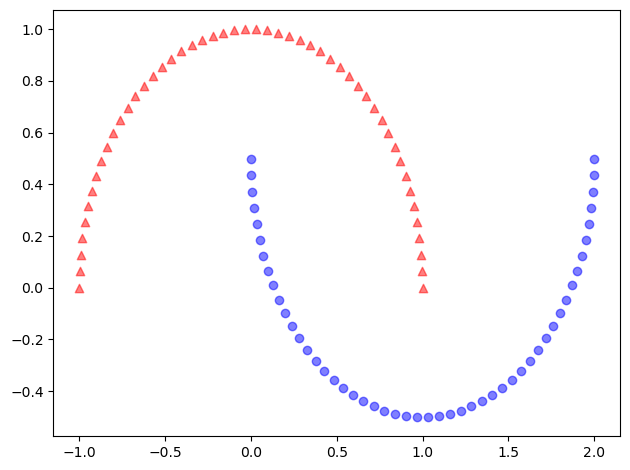

In [29]:
from sklearn.datasets import make_moons 
import matplotlib.pyplot as plt 
X,y=make_moons(n_samples=100,random_state=123)

plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],
            color='blue',marker='o',alpha=0.5)

plt.tight_layout()
plt.show()

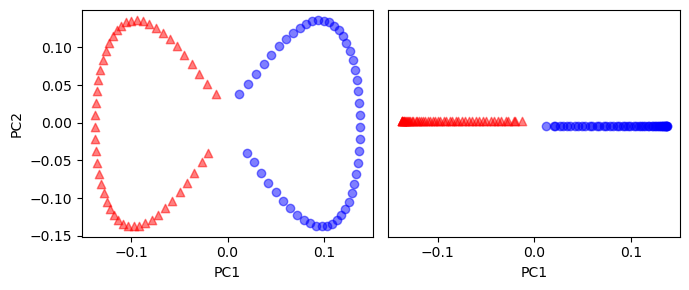

In [30]:
X_kpca=rbf_kernel_pca(X,gamma=15,k=2)


fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],
              color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],
              color='blue',marker='o',alpha=0.5)

ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,
              color='red',marker='^',alpha=0.5)

ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,
              color='blue',marker='o',alpha=0.5)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show() 
